<a href="https://colab.research.google.com/github/sahupra1357/CPE695AML/blob/main/HW4/Pradeep_Sahu_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1**: Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same feature of other samples. Take a random 80% samples for training and the rest 20% for test.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


In [ ]:
!ls

sample_data  Titanic.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image 

In [ ]:
pd.set_option('mode.chained_assignment', None)
data = pd.read_csv("Titanic.csv")
df = data.drop(data.columns[[0]],axis=1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
df['age'].fillna(value=df['age'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
X = df[["pclass","sex","age","sibsp"]]

In [ ]:
Y = df[["survived"]]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X['pclass'] = le.fit_transform(X['pclass'])

X['sex'] = le.fit_transform(X['sex'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# **Step 2:** Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

dclf = tree.DecisionTreeClassifier()
dclf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

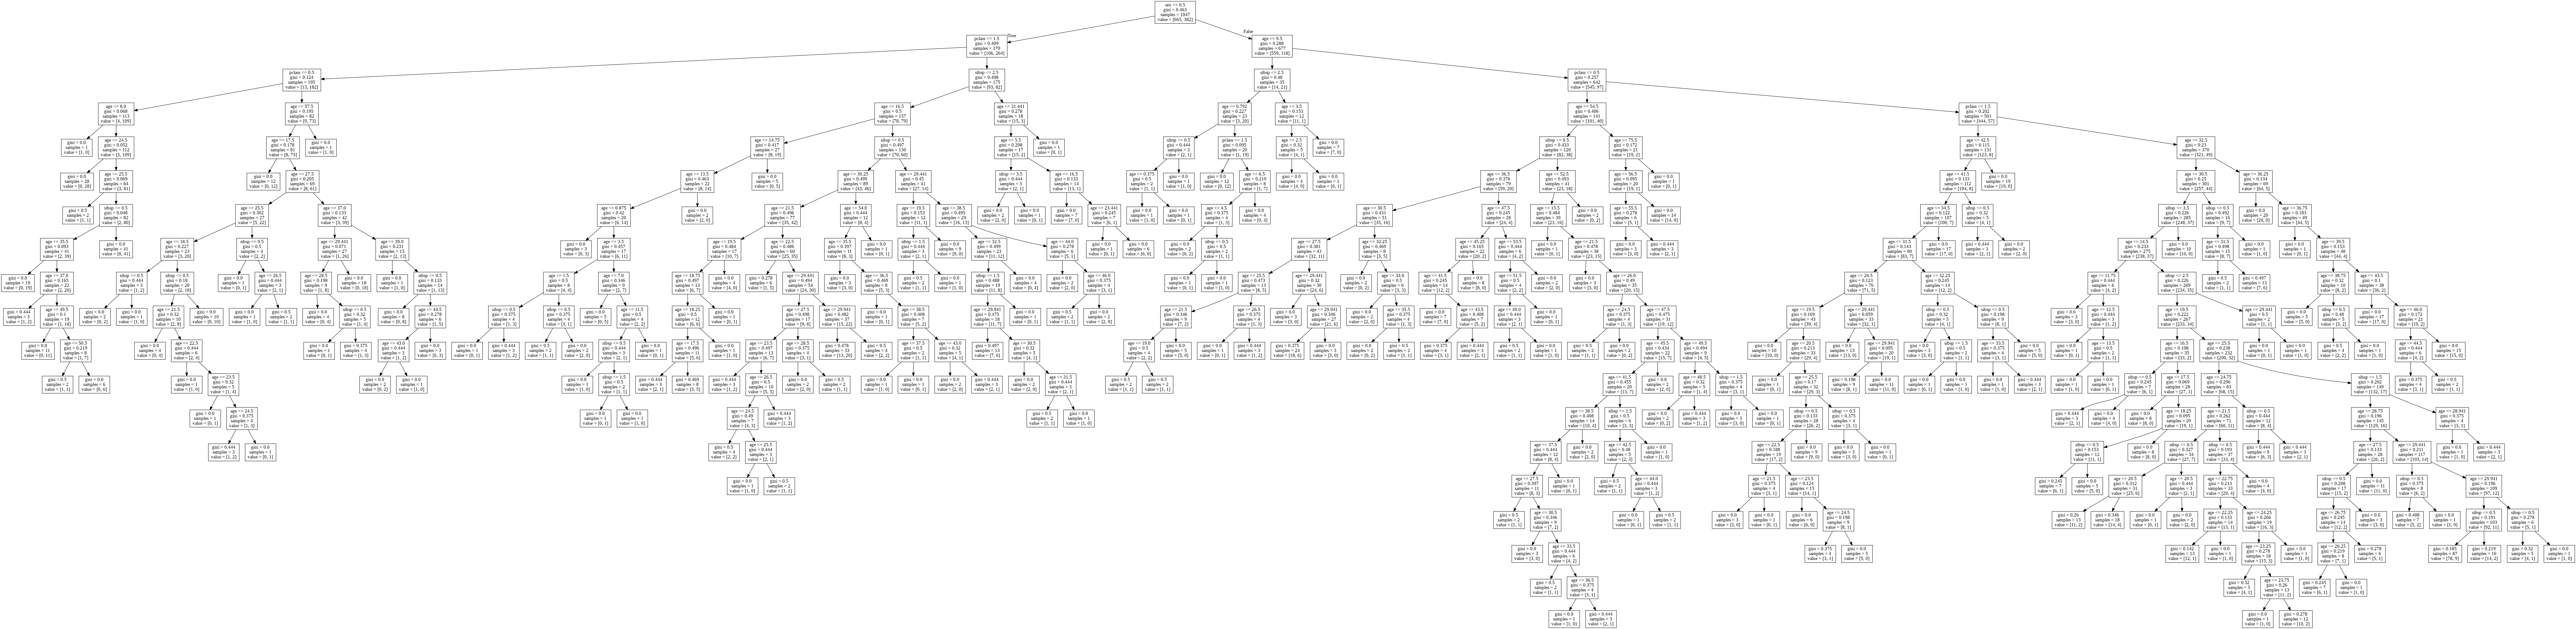

In [ ]:
dot_data = tree.export_graphviz(dclf, out_file=None,feature_names=["pclass","sex","age","sibsp"])
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [ ]:
print("Training Accuracy:{:.5f}".format(dclf.score(X_train, y_train)))
print("Testing Accuracy:{:.5f}".format(dclf.score(X_test,y_test)))

Training Accuracy:0.89207
Testing Accuracy:0.75191


# **Step 3**: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2.

In [ ]:
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
grid = {'max_depth':[3,4,5,6]}
grid_search = GridSearchCV(dclf, grid, cv=10, refit=True,return_train_score=True)
grid_search.fit(X, Y)
results = grid_search.cv_results_

print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_search.best_params_)
print(grid_search.best_score_)
final_model = grid_search.best_estimator_

[{'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}]
[0.72949501 0.73942454 0.7317616  0.72031122]
[0.8086743  0.8178413  0.82420759 0.83116818]
{'max_depth': 4}
0.7394245449207282


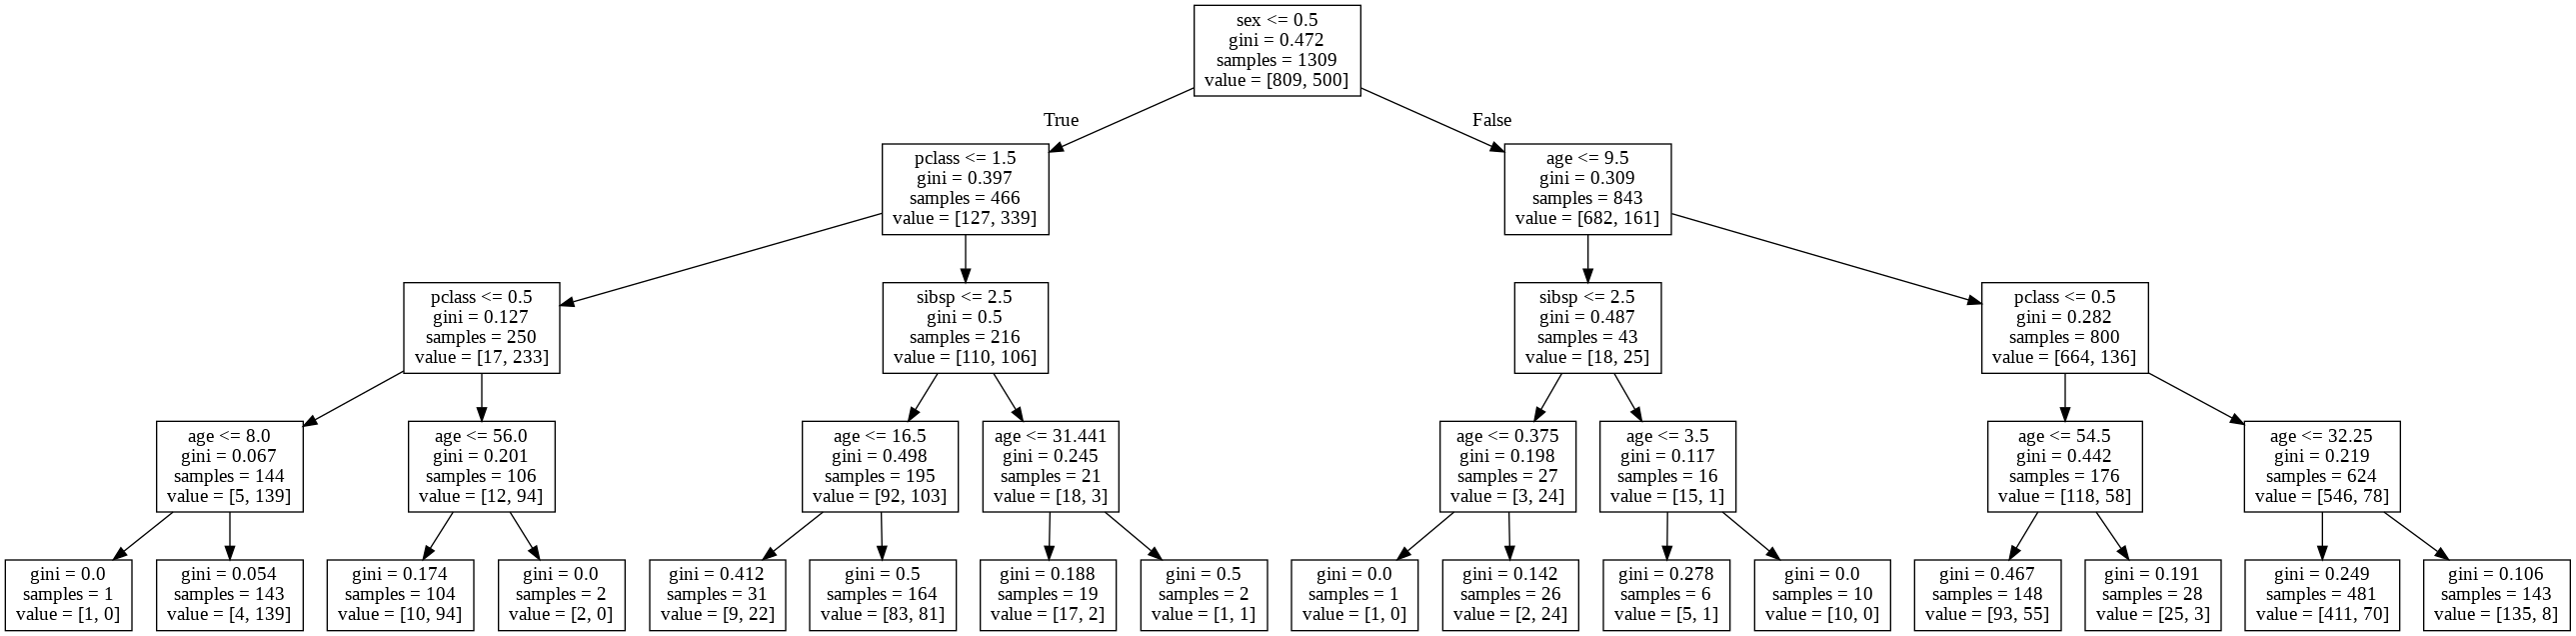

In [ ]:
dot_data = tree.export_graphviz(final_model, out_file=None,feature_names=["pclass","sex","age","sibsp"])
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# **Step 4:** For the pruned tree, report its accuracy on the test set for the following:

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,plot_confusion_matrix
print("Testing Accuracy:{:.5f}".format(final_model.score(X_test,y_test)))

Testing Accuracy:0.75573


In [ ]:
ypred = final_model.predict(X_test)

Percent Survivors Correctly Predicted:	 49.152542372881356 %
Percent Fatalities Correctly Predicted:	 97.22222222222221 %
Overall Accuracy:		 75.57251908396947 %



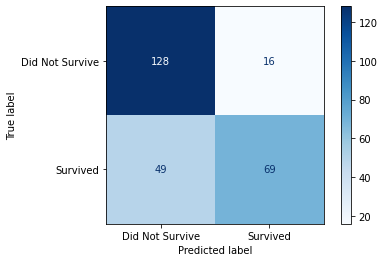

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
print('Percent Survivors Correctly Predicted:\t', 100*(tp / (tp + fn)), '%')
print('Percent Fatalities Correctly Predicted:\t', 100*(tn / (tn + fp)), '%')
print('Overall Accuracy:\t\t', 100*accuracy_score(ypred, y_test), '%\n')
plot_confusion_matrix(dclf, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['Did Not Survive', 'Survived'], values_format='d')
plt.show()

# **Step 5:** Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. You can set n_estimators as 50.

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rfclf=RandomForestClassifier(max_leaf_nodes=4,n_estimators=50)

rfclf.fit(X_train,y_train)

rfypred=rfclf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Percent Survivors Correctly Predicted:	 62.71186440677966 %
Percent Fatalities Correctly Predicted:	 87.5 %
Overall Accuracy:		 76.33587786259542 %



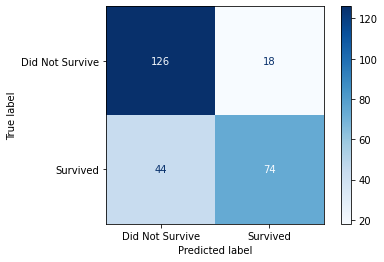

In [ ]:
rftn, rffp, rffn, rftp = confusion_matrix(y_test, rfypred).ravel()
print('Percent Survivors Correctly Predicted:\t', 100*(rftp / (rftp + rffn)), '%')
print('Percent Fatalities Correctly Predicted:\t', 100*(rftn / (rftn + rffp)), '%')
print('Overall Accuracy:\t\t', 100*accuracy_score(rfypred, y_test), '%\n')
plot_confusion_matrix(rfclf, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['Did Not Survive', 'Survived'], values_format='d')
plt.show()

**The accuracy increased using RandomForestClassifier.**